In [1]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
TEST_SIZE = 0.4

In [9]:
img=cv2.imread(r"C:\Users\User\Desktop\12.png")
print(img[:,:,0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [8]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    images = []
    labels = []

    # getting the root directory of all the data
    root = os.path.join(os.getcwd(), data_dir)

    # getting the list of all the subdirectories within the data folder each of which is a label for our model
    subdirs = sorted([int(i) for i in os.listdir(root)])

    for subdir in subdirs:
        # we'll count how many image does a catefory/label contains
#         count = 0
        for filename in os.listdir(os.path.join(root, str(subdir))):
            # loading the image file using opencv module
            img=cv2.imread(os.path.join(root,str(subdir),filename))

            # resizing the image matrix to make suitable for feeding into neural net
#             resized_img = np.resize(img,(IMG_WIDTH, IMG_HEIGHT, 3))
            resized_img = cv2.resize(img,(IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_AREA)
            # storing the image array into a list
            images.append(resized_img)
            
            # as each subdir name indicates a category of sign so it's our label
            labels.append(subdir)
#             count += 1

        # as each subdir name indicates a category of sign so it's our label
        # and we'll enter the label as many times in our list as many images it have
#         labels += [subdir]*count
    return (images, labels)

In [17]:
def get_model(NUM_CATEGORIES):
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # NUM_CATEGORIES = 3

    model = tf.keras.models.Sequential([

        # Convolutional layer. learns 32 filters using 3x3 kernel
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)),
        # Max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.2),
        
        # Convolutional layer. learns 32 filters using 3x3 kernel
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        # Max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.2),
        
#         # Convolutional layer. learns 32 filters using 3x3 kernel
#         tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same', padding='same'),
#         # Max-pooling layer, using 2x2 pool size
#         tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
# # #         tf.keras.layers.Dropout(0.2),
        
#         # Convolutional layer. learns 32 filters using 3x3 kernel
#         tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same', padding='same'),
#         # Max-pooling layer, using 2x2 pool size
#         tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
# #         tf.keras.layers.Dropout(0.2),
        
#         # Convolutional layer. learns 32 filters using 3x3 kernel
#         tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same', padding='same'),
#         # Max-pooling layer, using 2x2 pool size
#         tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
# #         tf.keras.layers.Dropout(0.2),
        
        # Flatten units
        tf.keras.layers.Flatten(),

        # Adding a hidden layer with 128 neurons
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        # Adding a hidden layer with 128 neurons
#         tf.keras.layers.Dense(512, activation = 'relu'),
#         # Adding dropout to remove random number of neurons from the net on every iteration
#         # It'll help us to avoid overfitting
#         tf.keras.layers.Dropout(0.2),

        # Adding an output layer with N neurons for all categories
        tf.keras.layers.Dense(NUM_CATEGORIES, activation = 'softmax')
    ])

    # Training the neural net
    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [ ]:
# Get image arrays and labels for all image files
images_2, labels_2 = load_data('gtsrb-small')
labels_2 = tf.keras.utils.to_categorical(labels_2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    np.array(images_2), np.array(labels_2), test_size=TEST_SIZE
)

In [10]:
print(x_train_2[0])
# Get a compiled neural network
model_2 = get_model(3)
print(y_train_2.shape, x_train_2.shape)
# Fit model on training data
model_2.fit(x_train_2, y_train_2, epochs=EPOCHS)

# Evaluate neural network performance
model_2.evaluate(x_test_2,  y_test_2, verbose=2)

NameError: name 'x_train_2' is not defined

In [19]:
# Get image arrays and labels for all image files
images, labels = load_data('gtsrb')

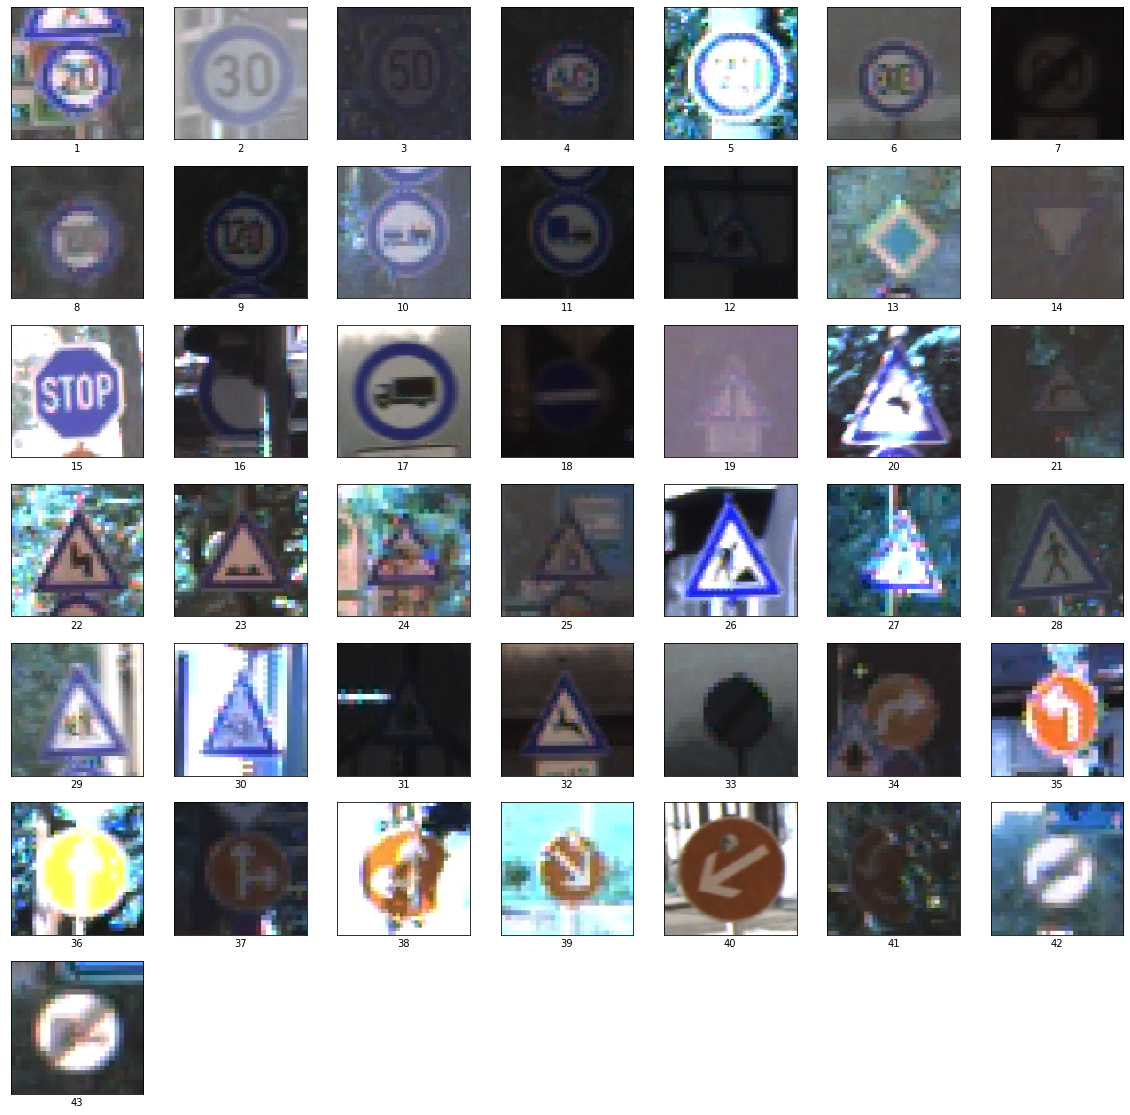

In [12]:
plt.figure(figsize=(20,20))
for i in range(43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = labels.index(i)
    plt.imshow(images[index], cmap=plt.cm.binary)
    plt.xlabel(i+1)
plt.show()

In [21]:
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

In [22]:

# print(len(set(labels)))
# plt.figure()
# plt.imshow(images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()
# Split data into training and testing sets


# Get a compiled neural network
model = get_model(43)


# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)


Train on 15984 samples
Epoch 1/10
15984/15984 [==============================] - 14s 861us/sample - loss: 4.6835 - accuracy: 0.0771
Epoch 2/10
15984/15984 [==============================] - 16s 1ms/sample - loss: 3.3375 - accuracy: 0.1206
Epoch 3/10
15984/15984 [==============================] - 19s 1ms/sample - loss: 2.8042 - accuracy: 0.2029
Epoch 4/10
15984/15984 [==============================] - 13s 822us/sample - loss: 2.4195 - accuracy: 0.3021- loss: 2.4184 - accuracy
Epoch 5/10
15984/15984 [==============================] - 13s 826us/sample - loss: 2.1402 - accuracy: 0.3760
Epoch 6/10
15984/15984 [==============================] - 13s 833us/sample - loss: 1.7647 - accuracy: 0.4604
Epoch 7/10
15984/15984 [==============================] - 20s 1ms/sample - loss: 1.3754 - accuracy: 0.5664
Epoch 8/10
15984/15984 [==============================] - 26s 2ms/sample - loss: 1.0580 - accuracy: 0.6635
Epoch 9/10
15984/15984 [==============================] - 25s 2ms/sample - loss: 0.7917 

[0.23625857381894066, 0.9253941]